# Text classification pipeline using Deep Learning

Authors:  
 - [Lior Gazit](https://www.linkedin.com/in/liorgazit).  
 - [Meysam Ghaffari](https://www.linkedin.com/in/meysam-ghaffari-ph-d-a2553088/).  

This notebook is taught and reviewed in our book:  
**[Mastering NLP from Foundations to LLMs](https://www.amazon.com/dp/1804619183)**  
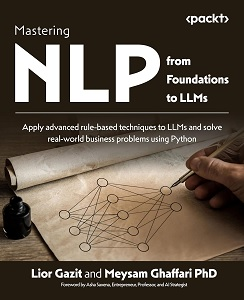

This Colab notebook is referenced in our book's Github repo:   
https://github.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs   
<a target="_blank" href="https://colab.research.google.com/github/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs/blob/seasonal_updates_2025/Chapter6_notebooks/Ch6_Text_Classification_DL.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>  
*Note: This notebook is updated and validated for 2025  

**Objective: Processing conclusions of medical publication and inferring whether the conclusion represents an advice or not.**
Based on Chapter 6, this notebook demonstrates a complete, end-to-end system design of a Deep Learning binary classifier.  
Given a text observation, the classifier with infer whether the content of the text is a medical advice or not.  

## The pipeline consists of:  
1. Code settings  
1. Gathering the data  
1. Processing the data
1. Prerocessing
1. Preliminary data exploration  
1. Feature engineering  
1. Exploring the new numerical features
1. Split to Train/Test
1. Preliminary statistical analysis and feasibility study
1. Feature selection
1. Machine Learning  
 11.1 Iterate over ML models  
 11.2 Generate the chosen model  
 11.3 Generating the train results  
 11.4 Generating the test results  
1. Deep Learning  
 12.1 Formatting our data  
 12.2 Training our LM  
    12.2.1 Training hyperparameters  
    12.2.2 Evaluation metric  
    12.2.3 Trainer object  
    12.2.4 Fine tuning  
    12.2.5 Conclusion about training length  
    12.2.6 Generating the train results   
    12.2.7 Generating the test results   

*Remark:  
This is a complete ML pipeline that is designed to be fully inclusive in a single notebook file. This is meant to be an instruction tool. In a professional dev environment, the design should be distributed across reproducible `.py` files for reproducibility and efficiency.  

## The Data:
A data set from [Hugging Face:
medical_meadow_health_advice](https://huggingface.co/datasets/medalpaca/medical_meadow_health_advice):   
>>
"This dataset holds thousands of text observation which are conclusion of medical publications. Each conclusion is annotated as to whether it represents an advice or not."  

**Requirements:**  
* When running in Colab, use this runtime notebook setting: `Python 3, T4 GPU`  

>*```Disclaimer: The content and ideas presented in this notebook are solely those of the authors and do not represent the views or intellectual property of the authors' employers.```*

Install:

In [1]:
# REMARK:
# If the below code error's out due to a Python package discrepency, it may be because new versions are causing it.
# In which case, set "default_installations" to False to revert to the original image:
default_installations = True
if default_installations:
  %pip -q install transformers datasets num2words autocorrect accelerate evaluate
else:
  import requests
  text_file_path = "requirements__Ch6_Text_Classification_DL.txt"
  url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs/main/Chapter6_notebooks/" + text_file_path
  res = requests.get(url)
  with open(text_file_path, "w") as f:
    f.write(res.text)

  %pip install -r requirements__Ch6_Text_Classification_DL.txt

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 622.8/622.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 23.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163.5/163.5 kB 10.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 6.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import re
from datasets import load_dataset, Dataset

from num2words import num2words
import nltk; nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

# ML imports:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# DL imports:
from transformers import AutoTokenizer, TrainingArguments, Trainer
from torch.utils.data import DataLoader
import evaluate



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Code Settings


In [3]:
# Items:
# source_of_dataset: Whether to load the dataset from the package, or from a URL (for the particular dataset in this notebook, both options are available)
# json_url: The url for the dataset's .json file
# db_name: The db name from HuggingFace that holds the raw data
# do_preprocessing: Logical, should preprocessing be performed
# do_enhanced_preprocessing: Logical, should the computation-heavy preprocessing be performed
# do_feature_eng: Logical
# maximize_a_priori: Logocal, should the univariate preliminary feature selection be based on a priori or a postiori stats
# num_chosen_features_per_class: Int, for the preliminary feature selection, how many features should be selected per class
# test_size: ratio between 0 - 1
# feature_eng_details: Either "TfidfVectorizer" (for TFIDF feature eng.) or "CountVectorizer" (for one hot encoding)
# seed: Integer, the random seed used to insure reproducibility of results
config_dict = {'source_of_dataset': "json",
               'json_url': "https://huggingface.co/datasets/medalpaca/medical_meadow_health_advice/raw/main/medical_meadow_health_advice.json",
               'db_name': "medalpaca/medical_meadow_health_advice",
               'do_preprocessing': True,
               'do_enhanced_preprocessing': False,
               'do_feature_eng': True,
               'maximize_a_priori': False,
               'num_chosen_features_per_class': 200,
               'test_size': 0.25,
               'feature_eng_details': "CountVectorizer-binary",
               'ngram_range_min': 1,
               'ngram_range_max': 3,
               'max_features': 1000,
               'seed': 0}

# Deep learning training parameters:
# See description of input parameters in documentation for transformers.TrainingArguments.
lm_training_args = TrainingArguments(
    output_dir="test_trainer",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    learning_rate=2e-5,
    evaluation_strategy="steps",
    logging_steps=100,
    report_to=[],  # Disable logging to Weights & Biases or other services
    )

layers_to_fine_tune = None

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


### Gathering the Data

In [4]:
# Taking the dataset either via the datasets package or directly from a URL:
if config_dict["source_of_dataset"] == "datasets package":
  dataset_raw = load_dataset(config_dict["db_name"])
  dataset_df = pd.DataFrame(dataset_raw["train"])
elif config_dict["source_of_dataset"] == "json":
  # For this particualr dataset, the owners posted a .json file to accomodate the dataset:
  dataset_df = pd.read_json(config_dict["json_url"])


### Processing the Data


In [5]:
dataset_df["_label_"] = dataset_df["output"]
dataset_df["text"] = dataset_df["input"]
dataset_df = dataset_df[["text", "_label_"]]

Let's have a quick look at the raw data:  

In [6]:
dataset_df.head(4).style.set_properties(**{'text-align': 'left'})

In [7]:
print("Distribution of original labels:\n")
dataset_df[["_label_"]].value_counts()

Distribution of original labels:



_label_                
This is no advice          6477
This is a weak advice      1338
This is a strong advice     861
Name: count, dtype: int64

While one could train a multi-class classification model that would diffrentiate between all 3 labels, we will reduce this to to being a binary classification problem.  
We are going to unite the two labels that indicate an advice so to have a binary decision: Whether a text represents and advice or not.  
So we are going to re-label:  
>>
Label 0: **Not** an advice    
Label 1: An advice

So now the classification problem is a binary classification problem.  

#### Picking the class to be targeted

In [8]:
dataset_df_binary = dataset_df.copy()
dataset_df_binary["_label_"] = dataset_df["_label_"].map({"This is no advice":0}).fillna(1).map(int)

In [9]:
print("Distribution of new labels:\n")
frequencies = dataset_df_binary[["_label_"]].value_counts()
frequencies

Distribution of new labels:



_label_
0          6477
1          2199
Name: count, dtype: int64

Recognizing the most frequent class.  
This establish a baseline accuracy (a prior) for this dataset:

In [10]:
most_frequent_class = frequencies.index[:][0][0]
print("The most frequent class is:", most_frequent_class)
print("And its baseline accuracy is:", round((dataset_df_binary["_label_"] == most_frequent_class).mean(), 3))

The most frequent class is: 0
And its baseline accuracy is: 0.747


### Preporcessing


Define the preprocessing utility functions:

In [11]:
def digits_to_words(match):
  """
  Convert string digits to the English words. The function distinguishes between
  cardinal and ordinal.
  E.g. "2" becomes "two", while "2nd" becomes "second"

  Input: str
  Output: str
  """
  suffixes = ['st', 'nd', 'rd', 'th']
  # Making sure it's lower cased so not to rely on previous possible actions:
  string = match[0].lower()
  if string[-2:] in suffixes:
    type='ordinal'
    string = string[:-2]
  else:
    type='cardinal'

  return num2words(string, to=type)


def spelling_correction(text):
    """
    Replace misspelled words with the correct spelling.

    Input: str
    Output: str
    """
    corrector = Speller()
    spells = [corrector(word) for word in text.split()]
    return " ".join(spells)


def remove_stop_words(text):
    """
    Remove stopwords.

    Input: str
    Output: str
    """
    stopwords_set = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stopwords_set])


def stemming(text):
    """
    Perform stemming of each word individually.

    Input: str
    Output: str
    """
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])


def lemmatizing(text):
    """
    Perform lemmatization for each word individually.

    Input: str
    Output: str
    """
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])




def preprocessing(input_text):
  """
  This function represents a complete pipeline for text preprocessing.

  Input: str
  Output: str
  """
  output = input_text
  # Lower casing:
  output = output.lower()
  # Convert digits to words:
  # The following regex syntax looks for matching of consequtive digits tentatively followed by an ordinal suffix:
  output = re.sub(r'\d+(st)?(nd)?(rd)?(th)?', digits_to_words, output, flags=re.IGNORECASE)
  # Remove punctuations and other special characters:
  output = re.sub('[^ A-Za-z0-9]+', '', output)

  if config_dict["do_enhanced_preprocessing"]:
    # Spelling corrections:
    output = spelling_correction(output)

  # Remove stop words:
  output = remove_stop_words(output)

  if config_dict["do_enhanced_preprocessing"]:
    # Stemming:
    output = stemming(output)
    # Lemmatizing:
    output = lemmatizing(output)

  return output

Perform the preprocessing:

In [12]:
dataset_clean = dataset_df_binary.copy()
if config_dict["do_preprocessing"]:
  dataset_clean["text"] = [preprocessing(text) for text in dataset_clean["text"]]

In [13]:
dataset_clean[["text", "_label_"]].head(10).style.set_properties(**{'text-align': 'left'})


## Preliminary data exploration
Every ML project should start with basic exploration of the data.  
The objectives are mainly to explore the nature of the data, and to study whether there is a connection between the "X" data (in our case, the input text) and the desired value, "Y" (in our case, classifying as advice).  

Here we start by looking at the most simple characteristic of the data: the length of each input.  
We will later explore the statistical dependence between the language used and the advice label.

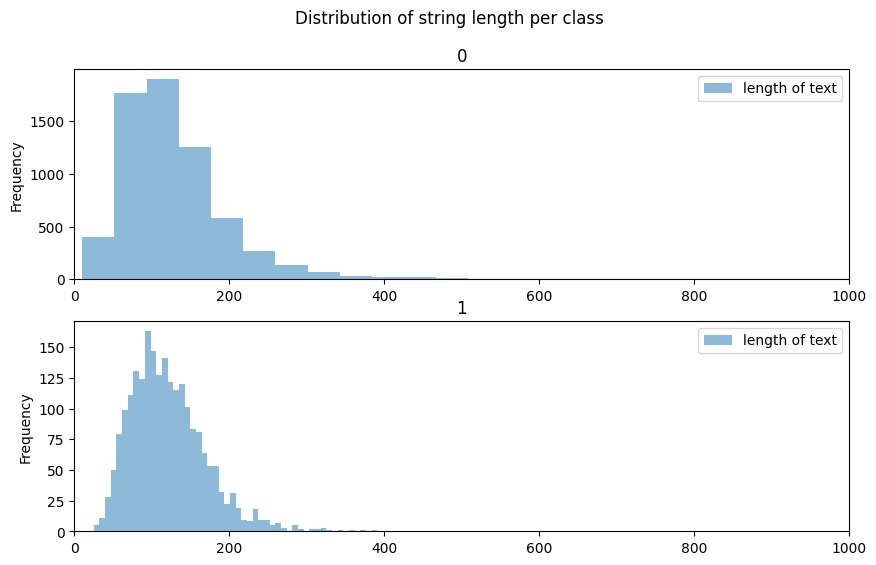

In [14]:
dataset_clean["length of text"] = dataset_clean["text"].map(len)
ax = dataset_clean.plot.hist(column=["length of text"], by="_label_", bins=50, alpha=0.5, figsize=(10, 6), title="Distribution of string length per class", xlim=[0, 1000])

## Feature engineering

In [15]:
def feat_eng_text_df(in_df, text_col, labels_col, config_dict):
  if "CountVectorizer-binary" == config_dict["feature_eng_details"]:
    print("Feature Engineering method: Binary (one hot encoding)")
    countvectorizer = CountVectorizer(ngram_range=(config_dict["ngram_range_min"], config_dict["ngram_range_max"]),
                                      stop_words='english',
                                      max_features=config_dict["max_features"],
                                      binary=True)

  elif "CountVectorizer-BOW" == config_dict["feature_eng_details"]:
    print("Feature Engineering method: Bag of words")
    countvectorizer = CountVectorizer(ngram_range=(config_dict["ngram_range_min"], config_dict["ngram_range_max"]),
                                      stop_words='english',
                                      max_features=config_dict["max_features"],
                                      binary=False)

  out_arr = countvectorizer.fit_transform(in_df[text_col])
  count_tokens = countvectorizer.get_feature_names_out()
  out_df = pd.DataFrame(data = out_arr.toarray(),columns = count_tokens)
  out_df[labels_col] = list(in_df[labels_col])
  return out_df


if config_dict["do_feature_eng"]:
  dataset_feat_eng = feat_eng_text_df(dataset_clean, 'text', '_label_', config_dict)
else:
  # This option isn't being supported, the notebook would fail. This option is
  # here to cater for a ML pipeline that uses deep learning language models that consume text, and not engineered features.
  dataset_feat_eng = dataset_clean.copy()

Feature Engineering method: Binary (one hot encoding)


## Exploring the new numerical features  

In [16]:
dataset_feat_eng.head()

abdominal  ability  able  abnormal  abnormalities  absence  acceptable  \
0          0        0     0         0              0        0           0   
1          0        0     0         0              0        0           0   
2          0        0     0         0              0        0           0   
3          0        0     0         0              0        0           0   
4          0        0     0         0              0        0           0   

   access  according  account  ...  wide  women  word  work  year  years  \
0       0          0        0  ...     0      0     0     0     0      0   
1       0          0        0  ...     0      0     0     0     0      0   
2       0          0        0  ...     0      0     0     0     0      0   
3       0          0        0  ...     0      0     0     0     0      0   
4       0          0        0  ...     0      0     0     0     0      0   

   young  younger  zeroone  _label_  
0      0        0        0        0  
1      0        0        0        0  
2      0        0        0        0  
3      0        0        0        0  
4      0        0        0        0  

[5 rows x 1001 columns]

In [17]:
dataset_feat_eng.describe().loc[['min', 'max', 'mean']]

abdominal   ability      able  abnormal  abnormalities   absence  \
min     0.00000  0.000000  0.000000  0.000000       0.000000  0.000000   
max     1.00000  1.000000  1.000000  1.000000       1.000000  1.000000   
mean    0.00438  0.004956  0.003688  0.003458       0.003804  0.003804   

      acceptable    access  according   account  ...      wide     women  \
min     0.000000  0.000000   0.000000  0.000000  ...  0.000000  0.000000   
max     1.000000  1.000000   1.000000  1.000000  ...  1.000000  1.000000   
mean    0.003804  0.004034   0.004841  0.006339  ...  0.002766  0.026971   

          word      work      year     years     young   younger   zeroone  \
min   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
max   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
mean  0.002651  0.006224  0.004034  0.017865  0.007492  0.003804  0.002997   

       _label_  
min   0.000000  
max   1.000000  
mean  0.253458  

[3 rows x 1001 columns]

## Split to Train/Test

In [18]:
dataset_feat_eng_test = dataset_feat_eng.sample(frac=config_dict["test_size"],random_state=config_dict['seed'])
dataset_feat_eng_train = dataset_feat_eng.drop(dataset_feat_eng_test.index)

## Preliminary statistical analysis and feasibility study
This process is perhaps the most valuable for the preliminary study prior to applying ML.  
This is where we measure the relationship between "X" and "Y" so to see whether there is a "correlation".  

If this were a regression problem, where X and Y are numerical, then it would make sense to evaluate the correlation between X and Y, so to learn whether one could expect a linear regression model to yield good results.

Since neither X nor Y are numerical in their nature, we seek to evaluated the **statistical dependence** between them, so to know whether a model would have any "signal" to pick up on.  

Calc:  
**P(feature | class)**

In [19]:
## Statistics of features per class:
means_by_class = dataset_feat_eng_train.groupby(by=["_label_"]).mean().T.sort_index()
means_by_class.head()

_label_               0         1
abdominal      0.004954  0.002407
ability        0.004747  0.005415
able           0.004954  0.001805
abnormal       0.005160  0.000602
abnormalities  0.004334  0.001805

Calc the ratio that reflects statistical dependence:  
**P(class, feature)/(P(class)P(feature))**  
And note that it could be rewritten as:  
**P(class | feature)/P(class)**  
Or equivalently:  
**P(feature | class)/P(feature)**  

\*Note:  
The below calculation is assuming that the numerical features of each text term is **binary**, only then is the below a probability measure.  
If another feature method is used, such as BoW or TF/IDF, then the below is not the probability, but a proxy of it.  

In [20]:
P_class = sorted([[c, np.mean(dataset_feat_eng["_label_"] == c)] for c in set(means_by_class.columns)])
P_feature = sorted([[f, np.mean(dataset_feat_eng[f] > 0)] for f in dataset_feat_eng.columns if f != "_label_"])
P_feature_inv = [[f, 1/p] for f, p in P_feature]

P_class_arr = np.array(P_class)
P_feature_arr = np.array(P_feature)
P_feature_inv_arr = np.array(P_feature_inv)
# Multiplying a "column vector" of feature probablities with a "line vector" of
# class probilities to get a matrix where each element is a product of probabilities:
P_class_prod_P_feature_inv_arr = np.outer(P_feature_inv_arr[:, 1].astype(float), P_class_arr[:, 1].astype(float))

P_class_given_feature = means_by_class.copy()
for feature_counter in range(len(P_class_given_feature)):
  for c in P_class_given_feature.columns:
    # Right hand side: P(feature | class) / P(feature)
    P_class_given_feature[c][feature_counter] = means_by_class[c][feature_counter] / P_feature_arr[feature_counter, 1].astype(float)




Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  P_class_given_feature[c][feature_counter] = means_by_class[c][feature_counter] / P_feature_arr[feature_counter, 1].astype(float)
<ipython-input-20-f2345704c2b7>:16: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  P_class_given_feature[c][feature_counter] = means_by_class[c][feature_counter] / P_feature_arr[feature_counter, 1].astype(float)
<ipython-input-20-f2345704c2b7>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  P_cl

**The terms that are most indicative of class "0":**

In [21]:
P_class_given_feature.sort_values([0], ascending=False).head(10)

_label_                  0         1
associated lower  1.685376  0.000000
metaanalysis      1.652965  0.000000
thirteen          1.566873  0.093218
twentythree       1.566873  0.000000
citation          1.566873  0.000000
median            1.525421  0.000000
verbal            1.515218  0.000000
blood pressure    1.515218  0.000000
hivone            1.504198  0.417617
abnormal          1.492260  0.174007

**The terms that are most indicative of class "1":**

In [22]:
P_class_given_feature.sort_values([1], ascending=False).head(10)

_label_                  0         1
promising         0.231060  4.041458
support use       0.061749  3.960164
option            0.030874  3.735155
alternative       0.096505  3.719795
tool              0.238762  3.712154
treatment option  0.000000  3.579577
treat             0.223839  3.480144
safe              0.344368  3.279367
findings support  0.503638  3.262635
suitable          0.447678  3.262635

## Feature selection
This is a univariate feature selection process.  
It is based on conditional dependency between a feature being 0/1 and a class being 0/1, thus the mean value of the feature is its probability.  
Note that the process of feature selection is done **on the training set**.   


For each class, choose the most indicative features.  
Either maximize the:   
* a-priori distribution P(feature | class), Max Liklihood  
or  
* a posteriori P(class | feature), MAP

In [23]:
chosen_features = []
if config_dict["maximize_a_priori"] == True:
  classes = means_by_class.columns
  for c in classes:
    chosen_features += list(means_by_class[c].sort_values(ascending=False).index[:config_dict["num_chosen_features_per_class"] + 1])
else:
  classes = P_class_given_feature.columns
  for c in classes:
    chosen_features += list(P_class_given_feature[c].sort_values(ascending=False).index[:config_dict["num_chosen_features_per_class"] + 1])


chosen_features = list(set(chosen_features))

In [24]:
chosen_features

['feasible',
 'birth',
 'strategies',
 'frequently',
 'included',
 'anesthesia',
 'et al',
 'evidencebased',
 'thickness',
 'nctone million',
 'days',
 'consider',
 'finding',
 'proportion',
 'noninvasive',
 'controls',
 'recent',
 'variation',
 'reduces',
 'score',
 'investigations',
 'finally',
 'chemotherapy',
 'ninetyeight',
 'statistical',
 'pathway',
 'twentyseven',
 'clinical practice',
 'findings provide',
 'tested',
 'public health',
 'adiposity',
 'useful',
 'protocols',
 'sample size',
 'consideration',
 'initial',
 'beliefs',
 'recommend',
 'approach',
 'al',
 'statistically significant',
 'sample',
 'program',
 'seven',
 'effectiveness',
 'figure',
 'adolescents',
 'involving',
 'later',
 'types',
 'visual',
 'context',
 'thousand seven',
 'nutrition',
 'developed',
 'genes',
 'major',
 'clinicaltrialsgov',
 'active commuting',
 'rats',
 'methylation',
 'evaluation',
 'age',
 'account',
 'rehabilitation',
 'therapies',
 'students',
 'decreased',
 'education',
 'patients un

### Leave only chosen features:
Now that we deduced which features are "important" based on the train set, we select them for both the train set and the test set.  

In [25]:
dataset_feat_eng_train_selected = dataset_feat_eng_train.filter(chosen_features + ["_label_"])
dataset_feat_eng_test_selected = dataset_feat_eng_test.filter(chosen_features + ["_label_"])

dataset_feat_eng_train_selected.head()

feasible  birth  strategies  frequently  included  anesthesia  et al  \
0         0      0           0           0         0           0      0   
1         0      0           0           0         0           0      0   
2         0      0           0           0         0           0      0   
3         0      1           0           0         0           0      0   
4         0      0           0           0         0           0      0   

   evidencebased  thickness  nctone million  ...  consistent  crs type  \
0              0          0               0  ...           0         0   
1              0          0               0  ...           0         0   
2              0          0               0  ...           0         0   
3              0          0               0  ...           0         0   
4              0          0               0  ...           0         0   

   grssixtythree  support  years  additional  independent  intensive  \
0              0        0      0           1            0          0   
1              0        0      0           0            0          0   
2              0        0      0           0            0          0   
3              0        0      0           0            0          0   
4              0        0      0           0            0          0   

   intraoperative  _label_  
0               0        0  
1               0        0  
2               0        0  
3               0        0  
4               0        0  

[5 rows x 403 columns]

In [26]:
dataset_feat_eng_train_selected["_label_"].value_counts()

_label_
0    4845
1    1662
Name: count, dtype: int64

# Machine Learning   


In [27]:
dataset_feat_eng_train_selected.head()

feasible  birth  strategies  frequently  included  anesthesia  et al  \
0         0      0           0           0         0           0      0   
1         0      0           0           0         0           0      0   
2         0      0           0           0         0           0      0   
3         0      1           0           0         0           0      0   
4         0      0           0           0         0           0      0   

   evidencebased  thickness  nctone million  ...  consistent  crs type  \
0              0          0               0  ...           0         0   
1              0          0               0  ...           0         0   
2              0          0               0  ...           0         0   
3              0          0               0  ...           0         0   
4              0          0               0  ...           0         0   

   grssixtythree  support  years  additional  independent  intensive  \
0              0        0      0           1            0          0   
1              0        0      0           0            0          0   
2              0        0      0           0            0          0   
3              0        0      0           0            0          0   
4              0        0      0           0            0          0   

   intraoperative  _label_  
0               0        0  
1               0        0  
2               0        0  
3               0        0  
4               0        0  

[5 rows x 403 columns]

Parse out the Y labels from the dataset, and change the variable type to suit the models.

In [28]:
x_features_train = dataset_feat_eng_train_selected.values[:, 0:-1]
y_labels_train = dataset_feat_eng_train_selected.values[:, -1]

x_features_test = dataset_feat_eng_test_selected.values[:, :-1]
y_labels_test = dataset_feat_eng_test_selected.values[:, -1]

#### Iterate over ML models

In [29]:
models = []
models.append(("Random Forest", RandomForestClassifier(random_state=config_dict['seed'])))
models.append(("LASSO", lm.LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=config_dict['seed'])))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=config_dict['seed'])))
models.append(("SVM", SVC(gamma='auto', random_state=config_dict['seed'])))

results = []
names = []
best_mean_result = 0
best_std_result = 0
for name, model in models:
  kfold = StratifiedKFold()
  cv_results = cross_val_score(model, X=x_features_train, y=y_labels_train, scoring='accuracy', cv=kfold)
  results.append(cv_results)
  names.append(name)
  print(name + ": mean(accuracy)=" + str(round(np.mean(cv_results), 3)) + ", std(accuracy)=" + str(round(np.std(cv_results), 3)))
  if (best_mean_result < np.mean(cv_results)) or \
    ((best_mean_result == np.mean(cv_results)) and (best_std_result > np.std(cv_results))):
    best_mean_result = np.mean(cv_results)
    best_std_result = np.std(cv_results)
    best_model_name = name
    best_model = model
print("\nBest model is:\n" + best_model_name)

Random Forest: mean(accuracy)=0.814, std(accuracy)=0.015
LASSO: mean(accuracy)=0.844, std(accuracy)=0.017
KNN: mean(accuracy)=0.789, std(accuracy)=0.011
Decision Tree: mean(accuracy)=0.797, std(accuracy)=0.015
SVM: mean(accuracy)=0.746, std(accuracy)=0.001

Best model is:
LASSO


Observe the distribution of the results across the validation folds:

<ipython-input-30-f9718c858c91>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  matplotlib.pyplot.boxplot(results, labels=names)


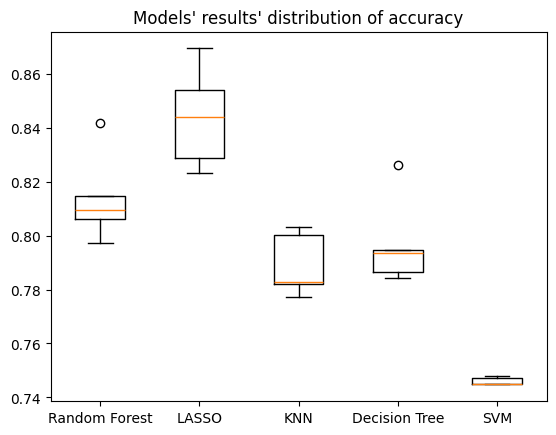

In [30]:
matplotlib.pyplot.boxplot(results, labels=names)
matplotlib.pyplot.title("Models' results' distribution of accuracy")
matplotlib.pyplot.show()

### Generate the chosen model

Optimize the hyperparameters:

In [31]:
model = lm.LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=config_dict['seed'])
params = {"C": np.linspace(start=0.001, stop=10, num=20)}
grid_search = GridSearchCV(model, params, scoring='accuracy')
grid_search.fit(x_features_train, y_labels_train)
print("The optimal hyperparameter 'C' is:", grid_search.best_params_["C"])


The optimal hyperparameter 'C' is: 3.158578947368421


Fit the optimized model to the training set:

In [32]:
model = lm.LogisticRegression(C=grid_search.best_params_["C"], max_iter=1000, random_state=config_dict['seed'])
model.fit(x_features_train, y_labels_train)

LogisticRegression(C=np.float64(3.158578947368421), max_iter=1000,
                   random_state=0)

### Generate the ML train results: Use for Design Choices

In [33]:
y_train_estimated = model.predict(x_features_train)
accuracy_train = np.mean(y_train_estimated == y_labels_train)
baseline_accuracy_train = np.mean(0 == y_labels_train)
accuracy_lift_train = 100 * (accuracy_train/baseline_accuracy_train - 1)

print("Results on the train set for a traditional ML model:\n-------------------------")
print("Baseline (dummy classifier) accuracy:", round(baseline_accuracy_train, 2))
print("Current model's accuracy:", round(accuracy_train, 2))
print("The accuracy lift is:", round(accuracy_lift_train), "%")

Results on the train set for a traditional ML model:
-------------------------
Baseline (dummy classifier) accuracy: 0.74
Current model's accuracy: 0.88
The accuracy lift is: 18 %


### Generate the ML test results: Use for presenting performance

In [34]:
y_test_estimated = model.predict(x_features_test)
accuracy_test = np.mean(y_test_estimated == y_labels_test)
baseline_accuracy_test = np.mean(0 == y_labels_test)
accuracy_lift = 100 * (accuracy_test/baseline_accuracy_test - 1)

print("Results on the test set for a traditional ML model:\n-------------------------")
print("Baseline (dummy classifier) accuracy:", round(baseline_accuracy_test, 2))
print("Current model's accuracy:", round(accuracy_test, 2))
print("The accuracy lift is:", round(accuracy_lift), "%")


print("\nConfusion Matrix:")
print(confusion_matrix(y_labels_test, y_test_estimated))
print("\nClassification Report:")
print(classification_report(y_labels_test, y_test_estimated))

Results on the test set for a traditional ML model:
-------------------------
Baseline (dummy classifier) accuracy: 0.75
Current model's accuracy: 0.85
The accuracy lift is: 13 %

Confusion Matrix:
[[1497  135]
 [ 189  348]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1632
           1       0.72      0.65      0.68       537

    accuracy                           0.85      2169
   macro avg       0.80      0.78      0.79      2169
weighted avg       0.85      0.85      0.85      2169



****
# Deep Learning  
Applying BERT, a Language Model to Text Classification

## Formatting our data
Adjusting the name of the label column:  
The design of the Transformers package requires the dataset's lables column to be named exactly `label`.  
In the above part of this notebook, where we did tranditional ML work, we had to pick a column name that **isn't** a natural word. The reason is that when we performed feature engineering, each word/Ngram was allocated its own column named after it. If the word "label" just happened to appear in the text, it could have a column called `label` defined for it in the dataframe, which would then **conflict with the labels' column name**.  
We no longer have that risk, and we need to comply with Transformers' requirements:  

In [35]:
df = dataset_df_binary.copy()
dataset_df_binary = dataset_df_binary.rename(columns={"_label_":"label"})

Load the tokenizer and the pre-trained Language Model:  

*Note about fine tuning with Hugging Face:  
As of 2025, Hugging Face's Trainer defaults to log metrics using Weights & Biases. That means it demands an API key for that.  
To fine-tune without needing a W&B API key, you can disable this integration by setting an env variable `WANDB_DISABLED=true`.  

In [36]:
!export WANDB_DISABLED=true

In [37]:
labels = list(dataset_df_binary["label"].unique())

from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
language_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(labels))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


>>
The previous cell would output a warnin starting with:  
`Some weights of the model checkpoint at bert-base-uncased were not used when initializing...`

>>
It is expected, as the model you imported had its pre-trained classification head (i.e. last neural layer) removed and a new "fresh" layer is initialized.  
That's what we want, as we seek to train that classification head to suit our dataset. Based on our choice, we may choose to also fine-tune other layers.    

In [38]:
print(f"The size of the model's token dictionary: {language_model.config.vocab_size}")

The size of the model's token dictionary: 30522


Split the dataset to three sub-sets:  
1. A held-out test set  
2. A train set that is split to two:  
  2.1 A subset used for training the neural network's parameters  
  2.2 A subset used to evaluate the progress of the training  

In [39]:
# Create a training set and a test set
test_df = dataset_df_binary.sample(frac=config_dict["test_size"],random_state=config_dict['seed'])
train_df = dataset_df_binary.drop(test_df.index)

# Splitting the train set to "just train" and "training evaluation" set:
train_eval_df = train_df.sample(frac=config_dict["test_size"],random_state=config_dict['seed'])
train_train_df = train_df.drop(train_eval_df.index)

# Conver the dataframes to a Dataset format per the Transformers package's requirement:
dataset_train_train = Dataset.from_pandas(train_train_df)
dataset_train_eval = Dataset.from_pandas(train_eval_df)
dataset_test = Dataset.from_pandas(test_df)

In order for the LM to process the text, it must be tokenized:

In [40]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_train_tokenized = dataset_train_train.map(tokenize_function, batched=True)
train_eval_tokenized = dataset_train_eval.map(tokenize_function, batched=True)
test_tokenized = dataset_test.map(tokenize_function, batched=True)

Map:   0%|          | 0/4880 [00:00<?, ? examples/s]

Map:   0%|          | 0/1627 [00:00<?, ? examples/s]

Map:   0%|          | 0/2169 [00:00<?, ? examples/s]

<a id='trainer'></a>

## Training our LM

We fine tune our pre-trained Language Model via `transformers`'s [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer).  

### Choosing which neural network layers to fine-tune

In [41]:
if layers_to_fine_tune == "head":
  print("Fine-tuning only the classification head!")
  language_model.train()
  for name, param in language_model.named_parameters():
    # Freeze parameters of all layers except classifier head:
    if 'classifier' not in name:
        param.requires_grad = False
else:
  print("Fine-tuning the entire neural network!")

Fine-tuning the entire neural network!


### Training hyperparameters

These are the settings for training our model:

### Evaluation metric

Defining the evaluation metric for the Language Model fine-tuning:

In [42]:
metric = evaluate.load("accuracy")

Setting the metric evaluation function for the trainer to utilize:

In [43]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # As the model returns a pair of logit values for each observation,
    # where each of the two logit value reflects the likelihood of each
    # class, we want to conver it to a classification:
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### Trainer object

In [44]:
trainer = Trainer(
    model=language_model,
    args=lm_training_args,
    train_dataset=train_train_tokenized,
    eval_dataset=train_eval_tokenized,
    compute_metrics=compute_metrics,
)

### Fine tuning

In [45]:
trainer.train()

TrainOutput(global_step=1220, training_loss=0.1859775266686424, metrics={'train_runtime': 1601.1744, 'train_samples_per_second': 6.096, 'train_steps_per_second': 0.762, 'total_flos': 2567963900313600.0, 'train_loss': 0.1859775266686424, 'epoch': 2.0})

Converting the training log to a dataframe for plotting:

In [46]:
training_logs_df = pd.DataFrame(trainer.state.log_history).groupby("step", as_index=False).first()

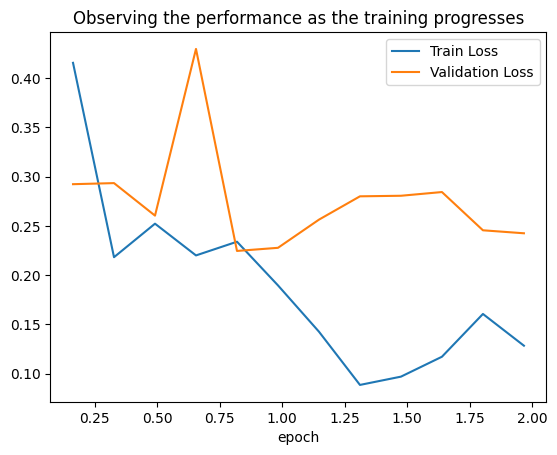

In [47]:
import matplotlib.pyplot as plt

training_logs_df.plot(x="epoch", y=["loss", "eval_loss"])
plt.title('Observing the performance as the training progresses')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

For reference,  
Here are the curves for when running with 5 epoches:  
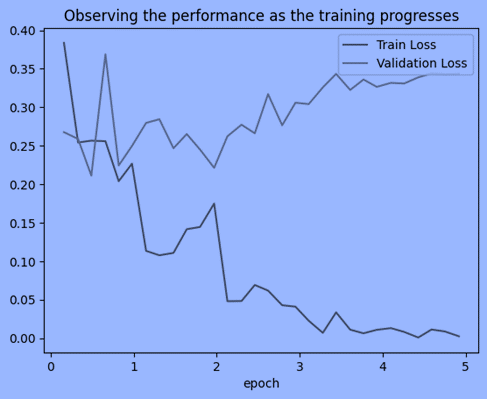

### Conclusion about training length
As can be seen, the evaluation set's results show that cutting the training time by half, using a single epoch instead of two, would be better.  
We chose two epoch so to let you witness that. It appears that after the first epoch the model starts to overfit the training set, thus becoming less accurate and less valuable.   
We would suggest examining the results with more than two epochs as well.  

### Generate the DL train results: Use for Design Choices

In [48]:
results_train_train = trainer.predict(train_train_tokenized)#
predictions_train_train = np.argmax(results_train_train[0], axis=-1)

accuracy_dl_train = np.mean(predictions_train_train == train_train_df["label"])
baseline_accuracy_dl_train = np.mean(most_frequent_class == train_train_df["label"])
accuracy_dl_lift_train = 100 * (accuracy_dl_train/baseline_accuracy_dl_train - 1)

print("Results on the train set for a DL Language Model:\n----------------------------------------------------")
print("Baseline (dummy classifier) accuracy:", round(baseline_accuracy_dl_train, 2))
print("Current model's accuracy:", round(accuracy_dl_train, 2))
print("The accuracy lift is:", round(accuracy_dl_lift_train), "%")

Results on the train set for a DL Language Model:
----------------------------------------------------
Baseline (dummy classifier) accuracy: 0.74
Current model's accuracy: 0.98
The accuracy lift is: 32 %


### Generate the DL test results: Use for presenting performance

In [49]:
results_test = trainer.predict(test_tokenized)
predictions_test = np.argmax(results_test[0], axis=-1)

accuracy_dl_test = np.mean(predictions_test == test_df["label"])
baseline_accuracy_dl_test = np.mean(most_frequent_class == test_df["label"])
accuracy_dl_lift = 100 * (accuracy_dl_test/baseline_accuracy_dl_test - 1)

print("Results on the test set for a DL Language Model:\n---------------------------------------------------")
print("Baseline (dummy classifier) accuracy:", round(baseline_accuracy_dl_test, 2))
print("Current model's accuracy:", round(accuracy_dl_test, 2))
print("The accuracy lift is:", round(accuracy_dl_lift), "%")


print("\nConfusion Matrix:")
print(confusion_matrix(test_df["label"], predictions_test))
print("\nClassification Report:")
print(classification_report(test_df["label"], predictions_test))

Results on the test set for a DL Language Model:
---------------------------------------------------
Baseline (dummy classifier) accuracy: 0.75
Current model's accuracy: 0.95
The accuracy lift is: 26 %

Confusion Matrix:
[[1563   69]
 [  42  495]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1632
           1       0.88      0.92      0.90       537

    accuracy                           0.95      2169
   macro avg       0.93      0.94      0.93      2169
weighted avg       0.95      0.95      0.95      2169



<a id='pytorch_native'></a>